In [22]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("IEA-EV-dataEV salesHistoricalCars.csv")
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [24]:
filtered_df = df[
    (df["parameter"] == "EV sales") &
    (df["mode"] == "Cars") &
    (df["powertrain"] == "BEV") &
    (df["unit"] == "Vehicles")
]
filtered_df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
9,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
10,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190.0
21,Australia,Historical,EV sales,Cars,BEV,2014,Vehicles,370.0
22,Australia,Historical,EV sales,Cars,BEV,2015,Vehicles,760.0


In [25]:
selected_regions = filtered_df['region'].value_counts().head(2).index.tolist()
selected_regions

['Brazil', 'Belgium']

In [26]:
region_series = {
    region: filtered_df[filtered_df['region'] == region][['year', 'value']].rename(columns={'year': 'ds', 'value': 'y'})
    for region in selected_regions}
region_series

{'Brazil':        ds        y
 280  2010     10.0
 281  2011      8.0
 284  2012     22.0
 287  2013     39.0
 291  2014     61.0
 295  2015     61.0
 302  2016    130.0
 307  2017    140.0
 314  2018    180.0
 319  2019    540.0
 326  2020    800.0
 333  2021   2900.0
 340  2022   8500.0
 347  2023  19000.0,
 'Belgium':        ds        y
 177  2010     48.0
 180  2011    280.0
 191  2012    570.0
 194  2013    500.0
 205  2014   1300.0
 209  2015   1400.0
 220  2016   2100.0
 225  2017   2700.0
 236  2018   3600.0
 241  2019   8800.0
 252  2020  15000.0
 257  2021  23000.0
 268  2022  38000.0
 273  2023  93000.0}

01:24:17 - cmdstanpy - INFO - Chain [1] start processing



Forecast for Brazil:


01:24:17 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\KPEKPE\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


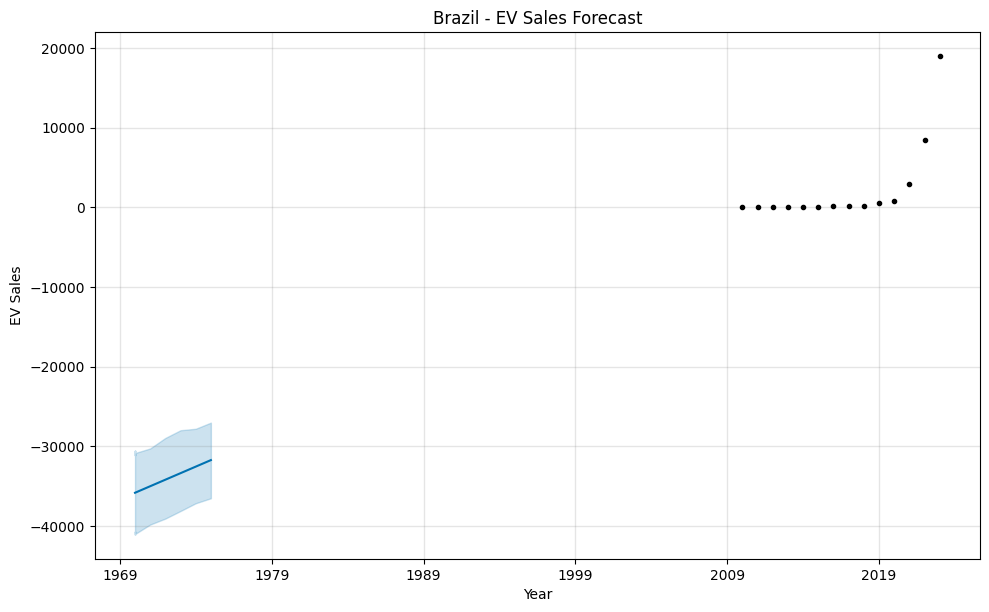

01:24:18 - cmdstanpy - INFO - Chain [1] start processing
01:24:18 - cmdstanpy - INFO - Chain [1] done processing



Forecast for Belgium:


c:\Users\KPEKPE\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


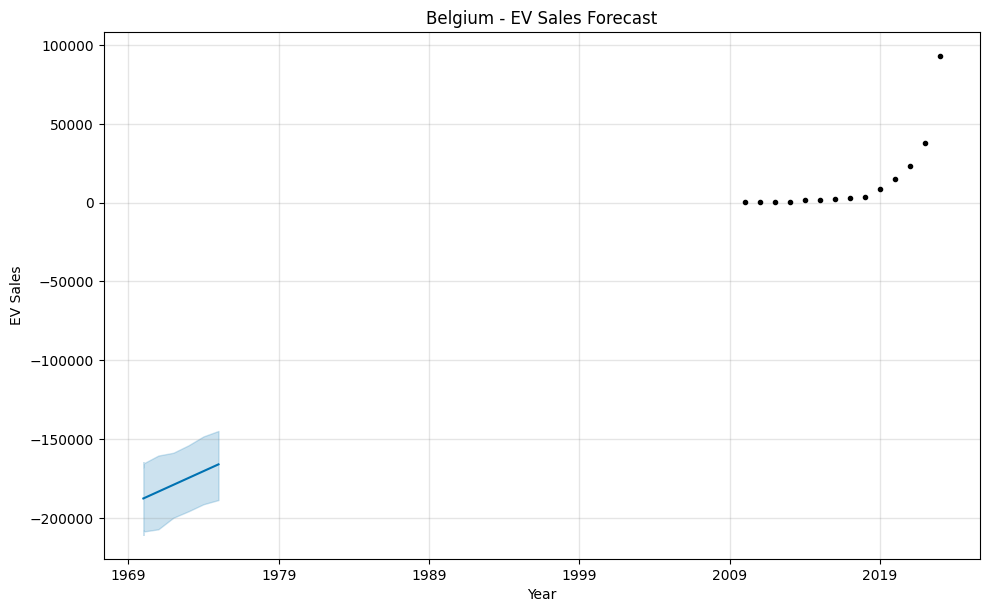

In [27]:
def forecast_region(region_name, data, years=5):
    model = Prophet(yearly_seasonality=False)
    model.fit(data)

    future = model.make_future_dataframe(periods=years, freq='Y')
    forecast = model.predict(future)
    model.plot(forecast)
    plt.title(f"{region_name} - EV Sales Forecast")
    plt.xlabel("Year")
    plt.ylabel("EV Sales")
    plt.grid(True)
    plt.show()
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(years)

for region in selected_regions:
    print(f"\nForecast for {region}:")
    forecast_region(region, region_series[region])